In [16]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib as mpl  # to visualize data
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib.colors as mcolors # to visualize colors
import seaborn as sns # to visualize data
from sklearn.feature_extraction.text import TfidfVectorizer # to transfrom the text into numbers
from sklearn.metrics import * # to calculate the metrics
import pickle # to export the model for testing


import lightgbm as lgb # model that is used

pd.set_option('display.max_colwidth', None) # setting to show full text content

beta = 1 / (2**0.5) # used for model evaluation

In [17]:
# Loading datasets
train_data = pd.read_csv('../../../Data-Preparation/sentiment140/traindata_with_stopwords_preprocessed.csv')
dev_data = pd.read_csv('../../../Data-Preparation/sentiment140/devdata_with_stopwords_preprocessed.csv')

In [18]:
# Load the vectorizer from file
with open('../../../Data-Preparation/sentiment140/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)
print(loaded_vectorizer)

TfidfVectorizer()


In [19]:
# Extraction of features and labels
feature_train = train_data['Text'].astype(str)
label_train = train_data['target']

feature_dev = dev_data['Text'].astype(str)
label_dev = dev_data['target']

### Vectorization of the Data

Vectorization is a necessary step, as machine learning models are only capable of processing numerical data. 

In [20]:
X_train = loaded_vectorizer.transform(feature_train)
X_dev = loaded_vectorizer.transform(feature_dev)

### without Hyperparametertuning

In [21]:
model1 = lgb.LGBMClassifier()
model1.fit(X_train, label_train)

[LightGBM] [Info] Number of positive: 486400, number of negative: 486400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 25.131643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 361905
[LightGBM] [Info] Number of data points in the train set: 972800, number of used features: 21014
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [22]:
train_data['Prediction1'] = model1.predict(X_train)
train_data.head()

,Text,Ground_Truth_Label,target,Prediction1
0,@ddlovato wow Not wise of your fear of the elevators incredible! i love you demi !,negative,0,4
1,"@rimamelati hahaha! i'm so so bored. what are you doing? haha, the plane crash is so so scary",negative,0,4
2,"@BrendaSanDiego Sure, i'm following you now",positive,4,4
3,"@yum9me does your itunes say that you can download OS3 yet, because mine says my OS is up to date",negative,0,4
4,@PetiteAntoin my mom's French Mauritian and I can't speak French Good luck learning it,negative,0,4


### with Hyperparametertuning

It was actively decided against the use of automated searches for the best hyperparameters, as this would require too much computational effort due to the size of the data set. We were unable to provide this computing power. 

manual tuning using the parameters listed for better accuracy on :
https://lightgbm.readthedocs.io/en/stable/Parameters-Tuning.html#for-better-accuracy


In [23]:
# accuracy: 0.78, f-Beta: 0,78
# ca. 2min model2.fit

# model2 = lgb.LGBMClassifier(
#     num_leaves=100,
#     max_bin=512,
#     learning_rate=0.05,
#     num_iterations=200,
# )


# acuracy:0.75, f-Beta:0.75   
# ca. 5.2min model2.fit

# model2 = lgb.LGBMClassifier(
#     num_leaves=200,
#     max_bin=512,
#     learning_rate=0.02,
#     num_iterations=300,
#     boosting_type='dart',
# )


# acuracy:0.71, f-Beta:0.71
# ca. 1.4 min model2.fit

# model2 = lgb.LGBMClassifier(
#     max_bin=512,
#     learning_rate=0.02,
#     num_iterations=300,
#     boosting_type='dart',
# )


# acuracy:0.73, f-Beta:0.74
# ca. 0.5min model2.fit

# model2 = lgb.LGBMClassifier(
#     boosting_type='dart',
# )


# acuracy:0.78, f-Beta:0.78
# ca. 1min model2.fit

# model2 = lgb.LGBMClassifier(
#     num_leaves=100,
# )



# acuracy:0.79, f-Beta:0.79
# ca. 1.3min model2.fit

# model2 = lgb.LGBMClassifier(
#     num_leaves=200,
# )



# acuracy:0.78, f-Beta:0.78
# ca. 1.2min model2.fit

# model = lgb.LGBMClassifier(
#     max_bin=2048,
# )


# acuracy:0.72, f-Beta:0.72
# ca. 0.4min model2.fit

# model2 = lgb.LGBMClassifier(
#     learning_rate=0.05, boosting_type= 'gbdt',
#     objective='binary',
#     metric = ['auc', 'binary_logloss'],
#     num_leaves=100, max_depth=10,
# )



# Best Model
# acuracy:0.79, f-Beta:0.79
# ca. 1min model2.fit

# größere num_leaves bringt bessere nichts mehr

model2 = lgb.LGBMClassifier(
    num_leaves=300,
)

In [24]:
model2.fit(X_dev, label_dev)

[LightGBM] [Info] Number of positive: 153600, number of negative: 153600
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 7.274566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317416
[LightGBM] [Info] Number of data points in the train set: 307200, number of used features: 8648
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(num_leaves=300)

In [25]:
train_data['Prediction2'] = model2.predict(X_train)

In [26]:
# calculate metrics
accuracy = accuracy_score(label_train, train_data['Prediction2'])
precision = precision_score(label_train, train_data['Prediction2'], pos_label=4)
recall = recall_score(label_train, train_data['Prediction2'], pos_label=4)
f1 = f1_score(label_train, train_data['Prediction2'], pos_label=4)
f_beta = fbeta_score(label_train, train_data['Prediction2'], beta=beta, pos_label=4)

# visualize metrics
print('LGBM with Hyperparametertuning')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")
print()

LGBM with Hyperparametertuning
Accuracy: 0.79
Precision: 0.79
Recall: 0.80
F1 Score: 0.79
F-beta Score (beta=0.7071067811865475): 0.7921630703998119



### evaluation

In [27]:
print('Comparison of LGBM with and without hyperparameter tuning')

# calculate metrics
accuracy = accuracy_score(train_data['target'], train_data['Prediction1'])
precision = precision_score(train_data['target'], train_data['Prediction1'], pos_label=4)
recall = recall_score(train_data['target'], train_data['Prediction1'], pos_label=4)
f1 = f1_score(train_data['target'], train_data['Prediction1'], pos_label=4)
f_beta = fbeta_score(train_data['target'], train_data['Prediction1'],  beta=beta, pos_label=4)

# visualize metrics
print('LGBM without Hyperparametertuning')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")
print()



# calculate metrics
accuracy_2 = accuracy_score(train_data['target'], train_data['Prediction2'])
precision_2 = precision_score(train_data['target'], train_data['Prediction2'], pos_label=4)
recall_2 = recall_score(train_data['target'], train_data['Prediction2'], pos_label=4)
f1_2 = f1_score(train_data['target'], train_data['Prediction2'], pos_label=4)
f_beta = fbeta_score(train_data['target'], train_data['Prediction2'],  beta=beta, pos_label=4)

# visualize metrics
print('LGBM with Hyperparametertuning')
print(f'Accuracy: {accuracy_2:.2f}')
print(f'Precision: {precision_2:.2f}')
print(f'Recall: {recall_2:.2f}')
print(f'F1 Score: {f1_2:.2f}')
print(f"F-beta Score (beta={beta}): {f_beta}")

Comparison of LGBM with and without hyperparameter tuning
LGBM without Hyperparametertuning
Accuracy: 0.76
Precision: 0.74
Recall: 0.80
F1 Score: 0.77
F-beta Score (beta=0.7071067811865475): 0.7615280342465217

LGBM with Hyperparametertuning
Accuracy: 0.79
Precision: 0.79
Recall: 0.80
F1 Score: 0.79
F-beta Score (beta=0.7071067811865475): 0.7921630703998119


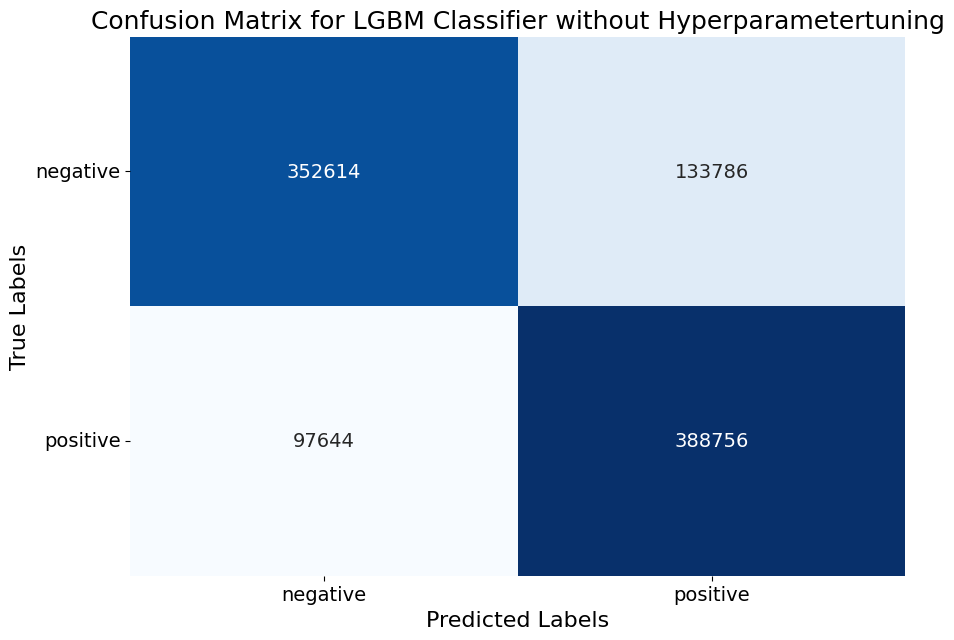

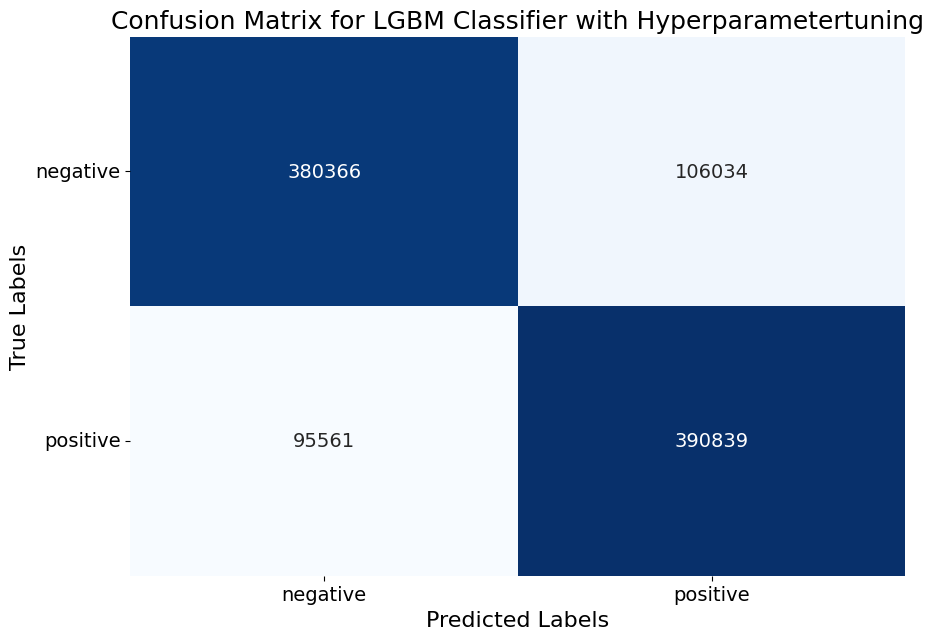

In [28]:
cm_nb = confusion_matrix(train_data['target'], train_data['Prediction1'])


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for LGBM Classifier without Hyperparametertuning', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()


cm_nb = confusion_matrix(train_data['target'], train_data['Prediction2'])


# creation of the Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 14})
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix for LGBM Classifier with Hyperparametertuning', fontsize=18)
plt.xticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14)
plt.yticks(ticks=[0.5, 1.5], labels=['negative', 'positive'], fontsize=14, rotation=0)
plt.show()

### export better model

model2 (with Hyperparametertuning) is exported since accuracy and f-beta score are higher

In [29]:
with open('lgbm_model_with_stopwords.pkl', 'wb') as file:
    pickle.dump(model2, file)